1. 데이터 로드
2. 데이터 구조 및 기초 통계 확인
3. 결측치 및 이상치 탐색
4. 데이터 시각화를 통한 탐색
5. 데이터 정제 및 전처리
6. 데이터 변환 및 피처 엔지니어링
7. 데이터 분할

### 1. 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# 노이즈 지우는 모듈
from denoising_bsj import find_similarity

In [2]:
# original_file = './data/netflix_user_data_unclean.csv'
# df = pd.read_csv(original_file)

# # 무의미한 컬럼 제거
# df.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'], axis=1, inplace=True)

# # 컬럼 제거한 파일 추출 -> 이제부터 이 파일 사용
# df.to_csv('./data/netflix_userdata.csv', index=False)

In [3]:
original_file = './data/netflix_userdata.csv'
df = pd.read_csv(original_file)
df

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn status,Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,C000001,12,10,4.85,4,Tablet,Action,Europe,On-Time,Basic,Yes,10,33.0,6250,5,2
1,C000002,12,8,1.75,9,Laptop,Thriller,Europe,On-Time,Basic,Yes,9,28.0,7018,1,5
2,C000003,3,4,2.75,9,Smart TV,Comedy,Asia,On-Time,Premium,Yes,3,18.0,1055,1,5
3,C000004,3,7,3,9,Smart TV,Drama,Europe,Delayed,Premium,Yes,5,32.0,6707,5,4
4,C000005,24,2,1.37,5,Mobile,Drama,North America,On-Time,Standard,Yes,2,59.0,1506,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119774,C062763,1,3,3.52,7,Laptop,Documentary,Asia,Delayed,Basic,Yes,5,47.0,4022,0,1
119775,C008969,6,6,3.54,1,Laptop,Documentary,Europe,On-Time,Basic,Yes,9,45.0,4216,5,5
119776,C106294,24,2,0.52,10,Desktop,Drama,North America,Delayed,Premium,Yes,3,54.0,8145,0,1
119777,C038767,12,1,3.68,1,Laptop,Action,Asia,Delayed,Basic,Yes,8,28.0,3664,3,2


In [4]:
# 숫자형과 문자형 컬럼 분리
numerical_cols = [
    'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)', 'Daily Watch Time (Hours)', 'Engagement Rate (1-10)',
    'Support Queries Logged', 'Age', 'Monthly Income ($)', 'Promotional Offers Used', 'Number of Profiles Created'
]

categorical_cols = [
    'Customer ID', 'Device Used Most Often', 'Genre Preference', 'Region', 'Payment History (On-Time/Delayed)', 'Subscription Plan', 'Churn status'
]

In [5]:
# 숫자형으로 변환하고 변환할 수 없을 경우 NaN으로 취급
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

### 2. 데이터 구조 및 기초 통계 확인

In [6]:
"""
원본 데이터 총 119,779개
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119779 entries, 0 to 119778
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Customer ID                         119378 non-null  object 
 1   Subscription Length (Months)        118819 non-null  float64
 2   Customer Satisfaction Score (1-10)  119322 non-null  float64
 3   Daily Watch Time (Hours)            118473 non-null  float64
 4   Engagement Rate (1-10)              119317 non-null  float64
 5   Device Used Most Often              119332 non-null  object 
 6   Genre Preference                    119342 non-null  object 
 7   Region                              119380 non-null  object 
 8   Payment History (On-Time/Delayed)   119330 non-null  object 
 9   Subscription Plan                   119383 non-null  object 
 10  Churn status                        119391 non-null  object 
 11  Support Queries Logged    

In [7]:
"""
== 각 지표의 평균값 ==

구독 기간: 9개월
만족도: 5.4점
일일 시청시간: 2.8시간
참여도: 5.5
연령대: 40대
월 수입: 5251달러
프로필 수: 3개
"""
df.describe()

,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
count,118819.000000,119322.000000,118473.000000,119317.000000,118877.000000,118542.000000,118594.000000,118957.000000,118975.000000
mean,9.169249,5.407771,2.829663,5.485103,4.948400,43.823716,5251.631364,2.422758,2.937785
std,8.213004,2.901673,1.302289,2.898160,3.108673,15.317243,2719.760243,1.688675,1.429728
min,1.000000,1.000000,0.500000,-2.000000,0.000000,18.000000,510.000000,0.000000,1.000000
25%,3.000000,3.000000,1.650000,3.000000,2.000000,30.000000,3071.000000,1.000000,2.000000
50%,6.000000,5.000000,2.890000,6.000000,5.000000,44.000000,5272.000000,2.000000,3.000000
75%,12.000000,8.000000,3.940000,8.000000,8.000000,57.000000,7596.000000,4.000000,4.000000
max,24.000000,15.000000,5.000000,10.000000,10.000000,70.000000,9994.000000,5.000000,5.000000


In [8]:
"""
사용률이 가장 높은 디바이스: 랩탑
선호도가 가장 높은 장르: SF
사용자가 가장 많은 대륙: Asia (중국 영향?)
가장 흔한 구독 플랜: Standard
"""
df.describe(include='object')

,Customer ID,Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn status
count,119378,119332,119342,119380,119330,119383,119391
unique,117245,103,147,116,44,64,18
top,###,Laptop,Sci-Fi,Asia,Delayed,Standard,Yes
freq,413,26652,19801,24282,60675,41764,106216


### 3. 결측치 및 이상치

In [9]:
df.isnull().sum()

Customer ID                            401
Subscription Length (Months)           960
Customer Satisfaction Score (1-10)     457
Daily Watch Time (Hours)              1306
Engagement Rate (1-10)                 462
Device Used Most Often                 447
Genre Preference                       437
Region                                 399
Payment History (On-Time/Delayed)      449
Subscription Plan                      396
Churn status                           388
Support Queries Logged                 902
Age                                   1237
Monthly Income ($)                    1185
Promotional Offers Used                822
Number of Profiles Created             804
dtype: int64

In [10]:
# 컬럼별 결측 비율
"""
대체로 0.3 ~ 1% 매우 적은 결측치
결측치 행은 그냥 날려도 큰 영향 없어 보임
특히 고객 ID 결측은 채울 수가 없음
"""
df.isnull().sum() / df.count() * 100

Customer ID                           0.335908
Subscription Length (Months)          0.807952
Customer Satisfaction Score (1-10)    0.382997
Daily Watch Time (Hours)              1.102361
Engagement Rate (1-10)                0.387204
Device Used Most Often                0.374585
Genre Preference                      0.366175
Region                                0.334227
Payment History (On-Time/Delayed)     0.376267
Subscription Plan                     0.331706
Churn status                          0.324983
Support Queries Logged                0.758767
Age                                   1.043512
Monthly Income ($)                    0.999207
Promotional Offers Used               0.691006
Number of Profiles Created            0.675772
dtype: float64

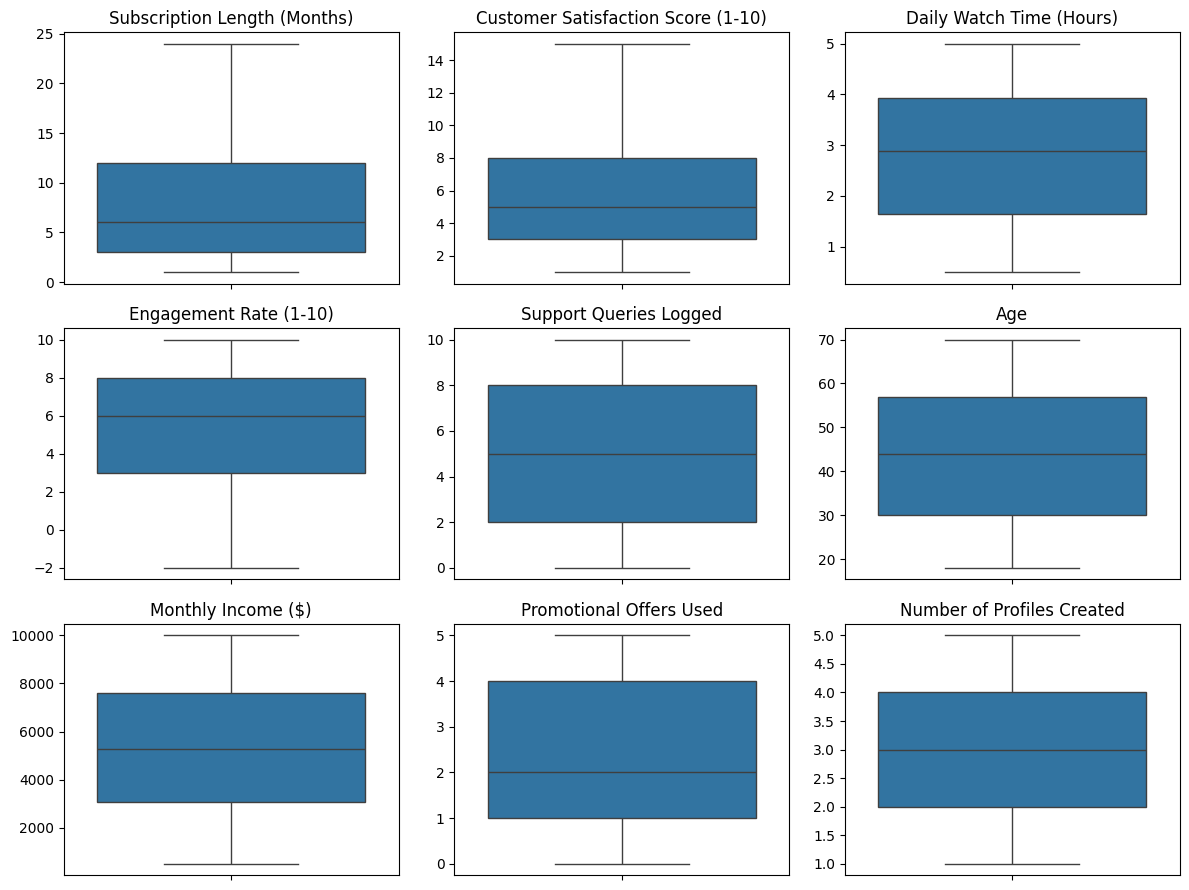

In [ ]:
# 이상치 시각화 - 박스플롯
"""
참여도에 음수 데이터?
그 외 눈에 띄는 이상치 없음
"""
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 3 * (len(numerical_features) // 3)))

for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3, 3, i + 1)
    sns.boxplot(y=df[col])

    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [12]:
# 연속형 수치(구독기간, 연령, 월 수입) 각 극단값 비율 확인
N = len(df)

print(f"구독 기간 15개월 이상: {df[df['Subscription Length (Months)'] >= 15]['Subscription Length (Months)'].count() / N * 100:.2f}%")
print(f"연령 60세 이상: {df[df['Age'] >= 60]['Age'].count() / N * 100:.2f}%")
print(f"월 수입 8,000달러 이상: {df[df['Monthly Income ($)'] >= 8000]['Monthly Income ($)'].count() / N * 100:.2f}%")

구독 기간 15개월 이상: 19.62%
연령 60세 이상: 19.67%
월 수입 8,000달러 이상: 21.49%


#### 노이즈 조정

##### Churn status

In [13]:
# 이탈 상태 노이즈
df.groupby('Churn status')['Churn status'].count()

Churn status
Maybe       423
No        12403
Nx           31
Ny           33
Nz           27
Yes      106216
Yex          19
Yey          26
Yez          13
Yxs          22
Yys          10
Yzs          14
xes          17
xo           28
yes          24
yo           32
zes          20
zo           33
Name: Churn status, dtype: int64

In [ ]:
# # 원본 데이터셋 생성 중의 오타로 간주하고 임의로 분류
# yes_type = ["Yes", "Yex", "Yey", "Yez", "Yxs", "Yys", "Yzs", "yes", "yo", "xes", "xo", "zes", "zo"]
# no_type = ["No", "Nx", "Ny", "Nz"]

# df["Churn status clean"] = df["Churn status"].replace(yes_type, "Yes").replace(no_type, "No")

##### Device Used Most Often

In [15]:
# 범주형 컬럼들 노이즈 확인
for col in categorical_cols:
    print(f"== {col} ==")
    print(df[col].unique())

== Customer ID ==
['C000001' 'C000002' 'C000003' ... 'C118049' 'C118050' 'C118051']
== Device Used Most Often ==
['Tablet' 'Laptop' 'Smart TV' 'Mobile' 'Desktop' 'Smart_Television' nan
 'Mobzle' 'Mybile' 'Deskxop' 'Tyblet' 'Laxtop' 'Laptoz' 'Tablez' 'Dxsktop'
 'xablet' 'Smxrt TV' 'Laptoy' 'Smart zV' 'Laztop' 'Lapzop' 'Mobize'
 'Smayt TV' 'zablet' 'Tzblet' 'yesktop' 'Desztop' 'Smazt TV' 'Moxile'
 'Dexktop' 'Lxptop' 'Lzptop' 'xaptop' 'yablet' 'Syart TV' 'Tablex'
 'Smart xV' 'Lapyop' 'Taxlet' 'Laptox' 'Mobily' 'Txblet' 'Moyile'
 'Dezktop' 'zaptop' 'xobile' 'Tablyt' 'Mobilx' 'xmart TV' 'Sxart TV'
 'Dysktop' 'zobile' 'Mozile' 'Smart Ty' 'Laptyp' 'Smaxt TV' 'Mobxle'
 'Laptxp' 'Desktzp' 'Smart Tx' 'Tabzet' 'Tablxt' 'Mobixe' 'Laytop'
 'yobile' 'Smart Tz' 'Desktxp' 'Szart TV' 'Mobyle' 'Mobiye' 'Smart yV'
 'Laptzp' 'Tabley' 'Tabxet' 'Dzsktop' 'Tazlet' 'Taylet' 'SmartzTV'
 'SmartxTV' 'Desytop' 'ymart TV' 'xesktop' 'zmart TV' 'Lapxop' 'zesktop'
 'Desktox' 'Smarz TV' 'Tablzt' 'yaptop' 'Mxbile' 'Mzb

In [ ]:
# 각 범주형 카테고리의 정답(라벨) 리스트
correct_categories = [
    ['Tablet', 'Laptop', 'Smart TV', 'Mobile', 'Desktop'],
    ['Action', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Sci-Fi', 'Documentary'],
    ['Europe', 'Asia', 'North America', 'Africa', 'South America'],
    ['On-Time', 'Delayed'],
    ['Basic', 'Premium', 'Standard']
]

In [ ]:
# 문자열 유사 매칭으로 노이즈 정상화
# 각 범주형 컬럼을 순회하며 오타 fix
for col, label in zip(categorical_cols[1:-1], correct_categories):
    df = find_similarity(df, col, label)

Device Used Most Often: ['Tablet', 'Laptop', 'Smart TV', 'Mobile', 'Desktop']
0
['Tablet' 'Laptop' 'Smart TV' 'Mobile' 'Desktop' 'Smart_Television'
 'unknown']
Genre Preference: ['Action', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Sci-Fi', 'Documentary']
0
['Action' 'Thriller' 'Comedy' 'Drama' 'Romance' 'Sci-Fi' 'Documentary'
 'unknown']
Region: ['Europe', 'Asia', 'North America', 'Africa', 'South America']
0
['Europe' 'Asia' 'North America' 'Africa' 'South America' 'unknown'
 'Eurasia']
Payment History (On-Time/Delayed): ['On-Time', 'Delayed']
0
['On-Time' 'unknown' 'Late' 'Delayed']
Subscription Plan: ['Basic', 'Premium', 'Standard']
0
['Basic' 'Premium' 'Standard' 'unknown']


In [86]:
# 디노이징을 거친 후 범주형 컬럼들 노이즈 확인
for col in categorical_cols:
    print(f"== {col} ==")
    print(df[col].unique())

== Customer ID ==
['C000001' 'C000002' 'C000003' ... 'C118049' 'C118050' 'C118051']
== Device Used Most Often ==
['Tablet' 'Laptop' 'Smart TV' 'Mobile' 'Desktop' 'unknown']
== Genre Preference ==
['Action' 'Thriller' 'Comedy' 'Drama' 'Romance' 'Sci-Fi' 'Documentary'
 'unknown']
== Region ==
['Europe' 'Asia' 'North America' 'Africa' 'South America' 'unknown'
 'Eurasia']
== Payment History (On-Time/Delayed) ==
['On-Time' 'Delayed' 'unknown']
== Subscription Plan ==
['Basic' 'Premium' 'Standard' 'Standrd' nan 'Baxic' 'Standarz' 'Pxemium'
 'Szandard' 'Premxum' 'Premiuy' 'Baszc' 'Bzsic' 'Bayic' 'xremium'
 'Prezium' 'Stzndard' 'Pzemium' 'Standary' 'Premyum' 'Sxandard' 'Premiym'
 'Standayd' 'Prxmium' 'Standazd' 'Preyium' 'Basiz' 'Staxdard' 'Premixm'
 'xasic' 'Basyc' 'zasic' 'Stanyard' 'Stanzard' 'Standaxd' 'Stxndard'
 'Basix' 'Syandard' 'Premiux' 'Pyemium' 'Stanxard' 'Bysic' 'Prexium'
 'Standzrd' 'Standyrd' 'Basiy' 'Premiuz' 'ztandard' 'xtandard' 'Bxsic'
 'Premzum' 'Stazdard' 'yasic' 'Basxc' 

In [88]:
df['Subscription Plan'].unique()

array(['Basic', 'Premium', 'Standard', 'Standrd', nan, 'Baxic',
       'Standarz', 'Pxemium', 'Szandard', 'Premxum', 'Premiuy', 'Baszc',
       'Bzsic', 'Bayic', 'xremium', 'Prezium', 'Stzndard', 'Pzemium',
       'Standary', 'Premyum', 'Sxandard', 'Premiym', 'Standayd',
       'Prxmium', 'Standazd', 'Preyium', 'Basiz', 'Staxdard', 'Premixm',
       'xasic', 'Basyc', 'zasic', 'Stanyard', 'Stanzard', 'Standaxd',
       'Stxndard', 'Basix', 'Syandard', 'Premiux', 'Pyemium', 'Stanxard',
       'Bysic', 'Prexium', 'Standzrd', 'Standyrd', 'Basiy', 'Premiuz',
       'ztandard', 'xtandard', 'Bxsic', 'Premzum', 'Stazdard', 'yasic',
       'Basxc', 'Przmium', 'Staydard', 'zremium', 'Standarx', 'yremium',
       'Premizm', 'Prymium', 'Bazic', 'ytandard', 'Styndard', 'Standxrd'],
      dtype=object)

In [ ]:
# 중간 저장
df.to_csv('./data/netflix_userdata_denoised.csv', index=False)

In [89]:
df_denoised = pd.read_csv('./data/netflix_userdata_denoised.csv')
df_denoised

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn status,Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created,Churn status clean
0,C000001,12.0,10.0,4.85,4.0,Tablet,Action,Europe,On-Time,Basic,Yes,10.0,33.0,6250.0,5.0,2.0,Yes
1,C000002,12.0,8.0,1.75,9.0,Laptop,Thriller,Europe,On-Time,Basic,Yes,9.0,28.0,7018.0,1.0,5.0,Yes
2,C000003,3.0,4.0,2.75,9.0,Smart TV,Comedy,Asia,On-Time,Premium,Yes,3.0,18.0,1055.0,1.0,5.0,Yes
3,C000004,3.0,7.0,3.00,9.0,Smart TV,Drama,Europe,On-Time,Premium,Yes,5.0,32.0,6707.0,5.0,4.0,Yes
4,C000005,24.0,2.0,1.37,5.0,Mobile,Drama,North America,On-Time,Standard,Yes,2.0,59.0,1506.0,3.0,5.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119774,C062763,1.0,3.0,3.52,7.0,Laptop,Documentary,Asia,Delayed,Basic,Yes,5.0,47.0,4022.0,0.0,1.0,Yes
119775,C008969,6.0,6.0,3.54,1.0,Laptop,Documentary,Europe,On-Time,Basic,Yes,9.0,45.0,4216.0,5.0,5.0,Yes
119776,C106294,24.0,2.0,0.52,10.0,Desktop,Drama,North America,Delayed,Premium,Yes,3.0,54.0,8145.0,0.0,1.0,Yes
119777,C038767,12.0,1.0,3.68,1.0,Laptop,Action,Asia,Delayed,Basic,Yes,8.0,28.0,3664.0,3.0,2.0,Yes


In [94]:
for col in categorical_cols:
    print(f"== {col} ==")
    print(df_denoised[col].unique())

== Customer ID ==
['C000001' 'C000002' 'C000003' ... 'C118049' 'C118050' 'C118051']
== Device Used Most Often ==
['Tablet' 'Laptop' 'Smart TV' 'Mobile' 'Desktop' 'Smart_Television'
 'unknown']
== Genre Preference ==
['Action' 'Thriller' 'Comedy' 'Drama' 'Romance' 'Sci-Fi' 'Documentary'
 'unknown']
== Region ==
['Europe' 'Asia' 'North America' 'Africa' 'South America' 'unknown'
 'Eurasia']
== Payment History (On-Time/Delayed) ==
['On-Time' 'unknown' 'Late' 'Delayed']
== Subscription Plan ==
['Basic' 'Premium' 'Standard' 'unknown']
== Churn status ==
['Yes' 'No' 'Nx' nan 'Maybe' 'xes' 'Ny' 'Nz' 'zes' 'xo' 'Yxs' 'Yex' 'yes'
 'Yez' 'zo' 'yo' 'Yey' 'Yzs' 'Yys']


In [95]:
# 범주형 카테고리에 대한 기초 통계 재확인
"""
디노이징 전과 특별히 달라진 점 없음
"""
df_denoised.select_dtypes(include='object').describe()

,Customer ID,Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn status,Churn status clean
count,119378,119779,119779,119779,119779,119779,119391,119391
unique,117245,7,8,7,4,4,18,3
top,###,Laptop,Sci-Fi,Asia,On-Time,Standard,Yes,Yes
freq,413,26752,19860,24373,66377,42316,106216,106474


In [96]:
df_denoised['Device Used Most Often'] = df_denoised['Device Used Most Often'].replace('Smart_Television', 'Smart TV')
df_denoised['Payment History (On-Time/Delayed)'] = df_denoised['Payment History (On-Time/Delayed)'].replace('Late', 'Delayed')

for col in categorical_cols[1:-1]:
    print(f"== {col} ==")
    print(df_denoised[col].unique())

== Device Used Most Often ==
['Tablet' 'Laptop' 'Smart TV' 'Mobile' 'Desktop' 'unknown']
== Genre Preference ==
['Action' 'Thriller' 'Comedy' 'Drama' 'Romance' 'Sci-Fi' 'Documentary'
 'unknown']
== Region ==
['Europe' 'Asia' 'North America' 'Africa' 'South America' 'unknown'
 'Eurasia']
== Payment History (On-Time/Delayed) ==
['On-Time' 'unknown' 'Delayed']
== Subscription Plan ==
['Basic' 'Premium' 'Standard' 'unknown']


In [98]:
# 중간 저장
df_denoised.to_csv('./data/netflix_userdata_denoised.csv', index=False)

In [5]:
numerical_cols = [
    'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)', 'Daily Watch Time (Hours)', 'Engagement Rate (1-10)',
    'Support Queries Logged', 'Age', 'Monthly Income ($)', 'Promotional Offers Used', 'Number of Profiles Created'
]

categorical_cols = [
    'Customer ID', 'Device Used Most Often', 'Genre Preference', 'Region', 'Payment History (On-Time/Delayed)', 'Subscription Plan', 'Churn status clean'
]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# 노이즈 지우는 모듈
from denoising_bsj import find_similarity

In [3]:
df_denoised = pd.read_csv('./data/netflix_userdata_denoised.csv')
df_denoised

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn status,Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created,Churn status clean
0,C000001,12.0,10.0,4.85,4.0,Tablet,Action,Europe,On-Time,Basic,Yes,10.0,33.0,6250.0,5.0,2.0,Yes
1,C000002,12.0,8.0,1.75,9.0,Laptop,Thriller,Europe,On-Time,Basic,Yes,9.0,28.0,7018.0,1.0,5.0,Yes
2,C000003,3.0,4.0,2.75,9.0,Smart TV,Comedy,Asia,On-Time,Premium,Yes,3.0,18.0,1055.0,1.0,5.0,Yes
3,C000004,3.0,7.0,3.00,9.0,Smart TV,Drama,Europe,On-Time,Premium,Yes,5.0,32.0,6707.0,5.0,4.0,Yes
4,C000005,24.0,2.0,1.37,5.0,Mobile,Drama,North America,On-Time,Standard,Yes,2.0,59.0,1506.0,3.0,5.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119774,C062763,1.0,3.0,3.52,7.0,Laptop,Documentary,Asia,Delayed,Basic,Yes,5.0,47.0,4022.0,0.0,1.0,Yes
119775,C008969,6.0,6.0,3.54,1.0,Laptop,Documentary,Europe,On-Time,Basic,Yes,9.0,45.0,4216.0,5.0,5.0,Yes
119776,C106294,24.0,2.0,0.52,10.0,Desktop,Drama,North America,Delayed,Premium,Yes,3.0,54.0,8145.0,0.0,1.0,Yes
119777,C038767,12.0,1.0,3.68,1.0,Laptop,Action,Asia,Delayed,Basic,Yes,8.0,28.0,3664.0,3.0,2.0,Yes


### 4. 시각화 탐색

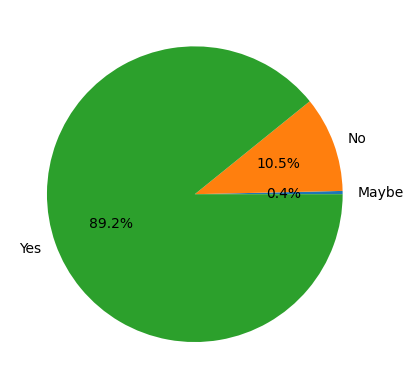

In [4]:
# 이탈 상태 비율
churn_ser = df_denoised.groupby('Churn status clean')['Churn status clean'].count()
plt.pie(x=churn_ser, labels=churn_ser.index, autopct='%.1f%%')
plt.show()

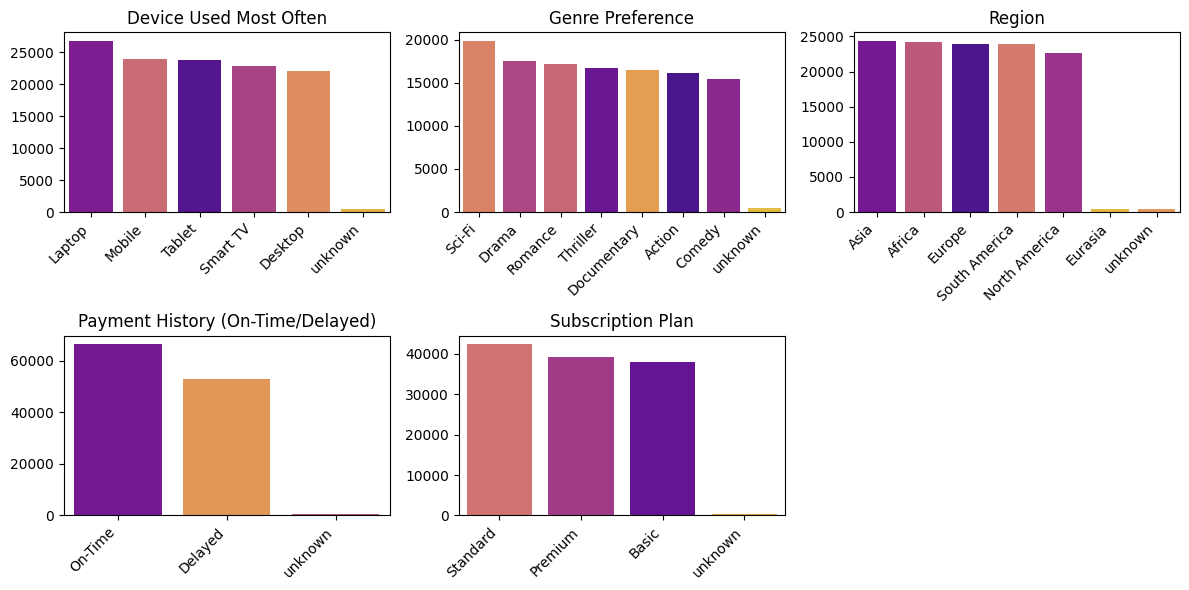

In [6]:
# 범주형 변수 분포
categorical_cols_target = categorical_cols[1:-1]

nrows = int(np.ceil(len(categorical_cols_target) / 3))
ncols = 3

plt.figure(figsize=(12, 3 * nrows))

for i, col in enumerate(categorical_cols_target):
    plt.subplot(nrows, ncols, i + 1)
    sns.countplot(x=col, data=df_denoised, hue=col, order=df_denoised[col].value_counts().index, palette='plasma')

    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

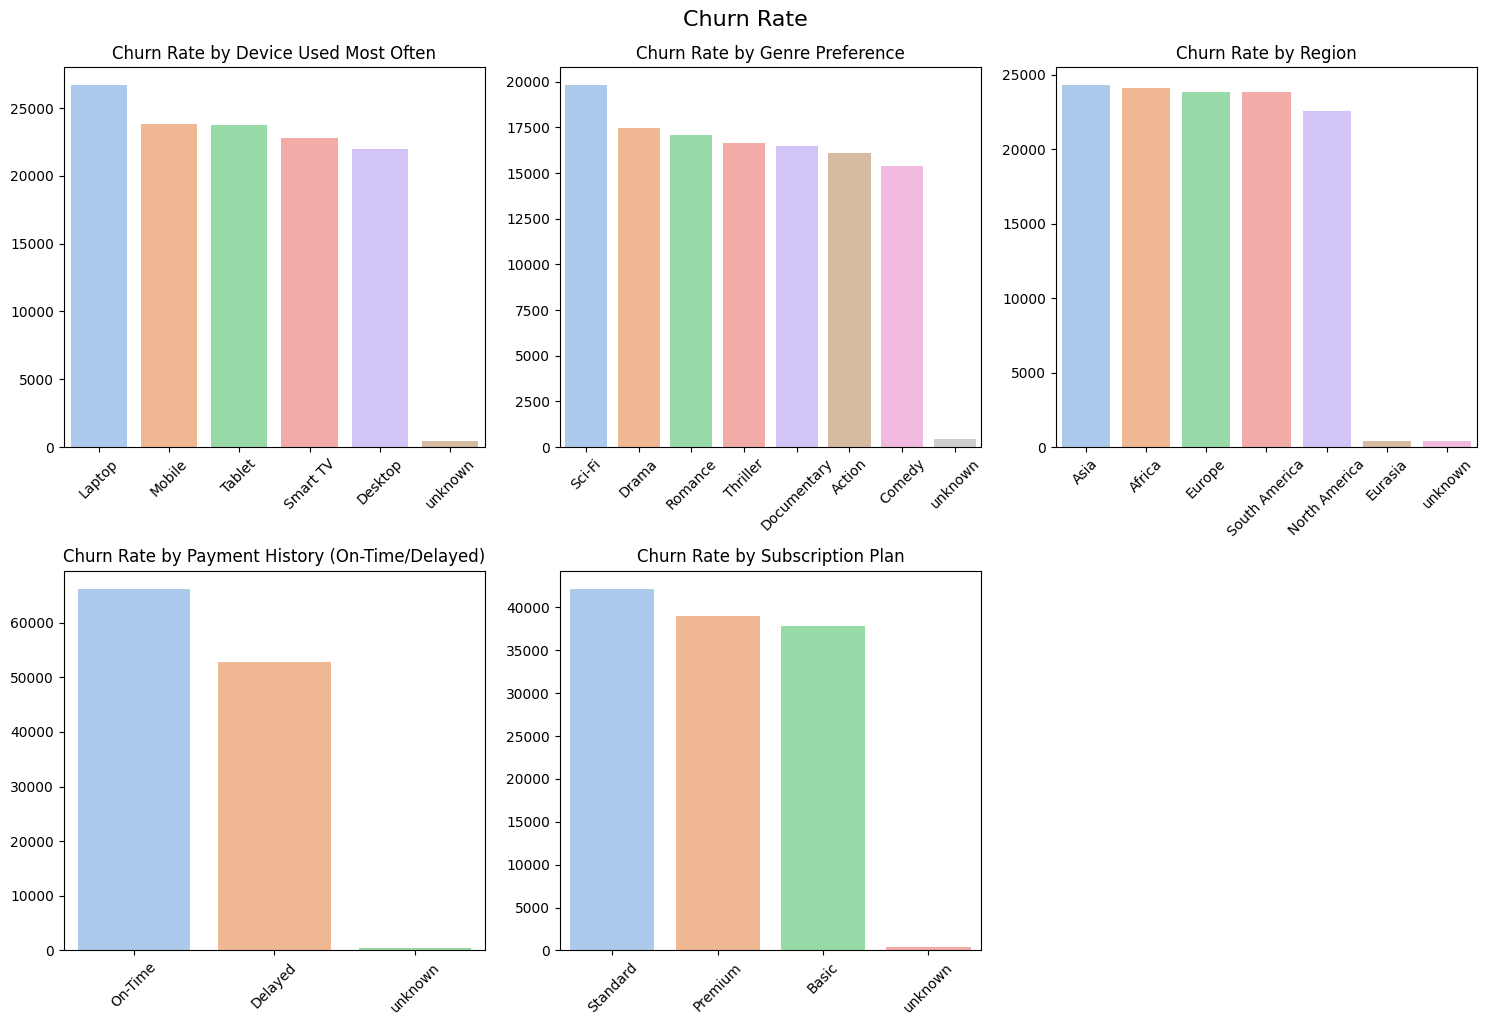

In [7]:
# 범주형 변수와 이탈 관계 확인
nrows = int(np.ceil(len(categorical_cols_target) / 3))
ncols = 3

plt.figure(figsize=(15, 5 * nrows))

for i, col in enumerate(categorical_cols_target):
    plt.subplot(nrows, ncols, i + 1)
    
    churn_rate = df_denoised.groupby(col)['Churn status clean'].count().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='pastel')

    plt.title(f'Churn Rate by {col}')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.suptitle('Churn Rate', y=1.02, fontsize=16)
plt.show()

### 5. 피처 엔지니어링

In [ ]:
# Churn status 컬럼 삭제
df_denoised.drop('Churn status', axis=1, inplace=True)
df_denoised.rename(columns={'Churn status clean': 'Churn'}, inplace=True)
df_denoised

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created,Churn
0,C000001,12.0,10.0,4.85,4.0,Tablet,Action,Europe,On-Time,Basic,10.0,33.0,6250.0,5.0,2.0,Yes
1,C000002,12.0,8.0,1.75,9.0,Laptop,Thriller,Europe,On-Time,Basic,9.0,28.0,7018.0,1.0,5.0,Yes
2,C000003,3.0,4.0,2.75,9.0,Smart TV,Comedy,Asia,On-Time,Premium,3.0,18.0,1055.0,1.0,5.0,Yes
3,C000004,3.0,7.0,3.00,9.0,Smart TV,Drama,Europe,On-Time,Premium,5.0,32.0,6707.0,5.0,4.0,Yes
4,C000005,24.0,2.0,1.37,5.0,Mobile,Drama,North America,On-Time,Standard,2.0,59.0,1506.0,3.0,5.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119774,C062763,1.0,3.0,3.52,7.0,Laptop,Documentary,Asia,Delayed,Basic,5.0,47.0,4022.0,0.0,1.0,Yes
119775,C008969,6.0,6.0,3.54,1.0,Laptop,Documentary,Europe,On-Time,Basic,9.0,45.0,4216.0,5.0,5.0,Yes
119776,C106294,24.0,2.0,0.52,10.0,Desktop,Drama,North America,Delayed,Premium,3.0,54.0,8145.0,0.0,1.0,Yes
119777,C038767,12.0,1.0,3.68,1.0,Laptop,Action,Asia,Delayed,Basic,8.0,28.0,3664.0,3.0,2.0,Yes


In [ ]:
# 10살 간격으로 연령대 컬럼 생성
min_age = df_denoised['Age'].min()
max_age = df_denoised['Age'].max()

bin_from = int(np.floor(min_age / 10) * 10)
bin_to = int(np.ceil(max_age / 10) * 10)

bins = list(range(bin_from, bin_to + 10, 10))
bins.append(99)
labels = [i for i in bins[:-1]]

df_denoised['Age_group'] = pd.cut(x=df_denoised['Age'], bins=bins, labels=labels, right=False)
df_denoised

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created,Churn,Age_group
0,C000001,12.0,10.0,4.85,4.0,Tablet,Action,Europe,On-Time,Basic,10.0,33.0,6250.0,5.0,2.0,Yes,30
1,C000002,12.0,8.0,1.75,9.0,Laptop,Thriller,Europe,On-Time,Basic,9.0,28.0,7018.0,1.0,5.0,Yes,20
2,C000003,3.0,4.0,2.75,9.0,Smart TV,Comedy,Asia,On-Time,Premium,3.0,18.0,1055.0,1.0,5.0,Yes,10
3,C000004,3.0,7.0,3.00,9.0,Smart TV,Drama,Europe,On-Time,Premium,5.0,32.0,6707.0,5.0,4.0,Yes,30
4,C000005,24.0,2.0,1.37,5.0,Mobile,Drama,North America,On-Time,Standard,2.0,59.0,1506.0,3.0,5.0,Yes,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119774,C062763,1.0,3.0,3.52,7.0,Laptop,Documentary,Asia,Delayed,Basic,5.0,47.0,4022.0,0.0,1.0,Yes,40
119775,C008969,6.0,6.0,3.54,1.0,Laptop,Documentary,Europe,On-Time,Basic,9.0,45.0,4216.0,5.0,5.0,Yes,40
119776,C106294,24.0,2.0,0.52,10.0,Desktop,Drama,North America,Delayed,Premium,3.0,54.0,8145.0,0.0,1.0,Yes,50
119777,C038767,12.0,1.0,3.68,1.0,Laptop,Action,Asia,Delayed,Basic,8.0,28.0,3664.0,3.0,2.0,Yes,20


In [39]:
df_denoised[df_denoised['Age'] >= 70]

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created,Churn,Age_group
12,C000013,3.0,3.0,1.17,9.0,Laptop,Romance,Asia,On-Time,Premium,8.0,70.0,4582.0,0.0,3.0,Yes,70
20,C000021,6.0,3.0,4.91,3.0,Tablet,Action,Asia,On-Time,Premium,3.0,70.0,5614.0,0.0,4.0,Yes,70
33,C000034,12.0,4.0,4.97,6.0,Laptop,Romance,Asia,On-Time,Premium,6.0,70.0,2928.0,0.0,3.0,No,70
65,C000066,1.0,5.0,2.28,8.0,Desktop,Sci-Fi,Africa,On-Time,Premium,3.0,70.0,7085.0,3.0,5.0,Yes,70
82,C000083,24.0,5.0,0.83,8.0,Smart TV,Drama,Europe,On-Time,Standard,6.0,70.0,2676.0,2.0,3.0,Yes,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119553,C007034,12.0,4.0,4.97,6.0,Laptop,Romance,Asia,Delayed,Premium,6.0,70.0,2928.0,0.0,3.0,Yes,70
119555,C044013,3.0,3.0,1.17,9.0,Laptop,Romance,Asia,Delayed,Premium,8.0,70.0,4582.0,0.0,3.0,Yes,70
119699,C075066,1.0,5.0,2.28,8.0,Desktop,Sci-Fi,Africa,Delayed,Premium,3.0,70.0,7085.0,3.0,5.0,No,70
119753,C004422,12.0,10.0,0.52,1.0,Tablet,Romance,Asia,On-Time,Premium,9.0,70.0,5145.0,0.0,4.0,Yes,70


In [52]:
df_denoised.to_csv('./data/netflix_userdata_denoised.csv', index=False)

In [ ]:
df_denoised['Age_group'].isnull().sum()

np.int64(1237)

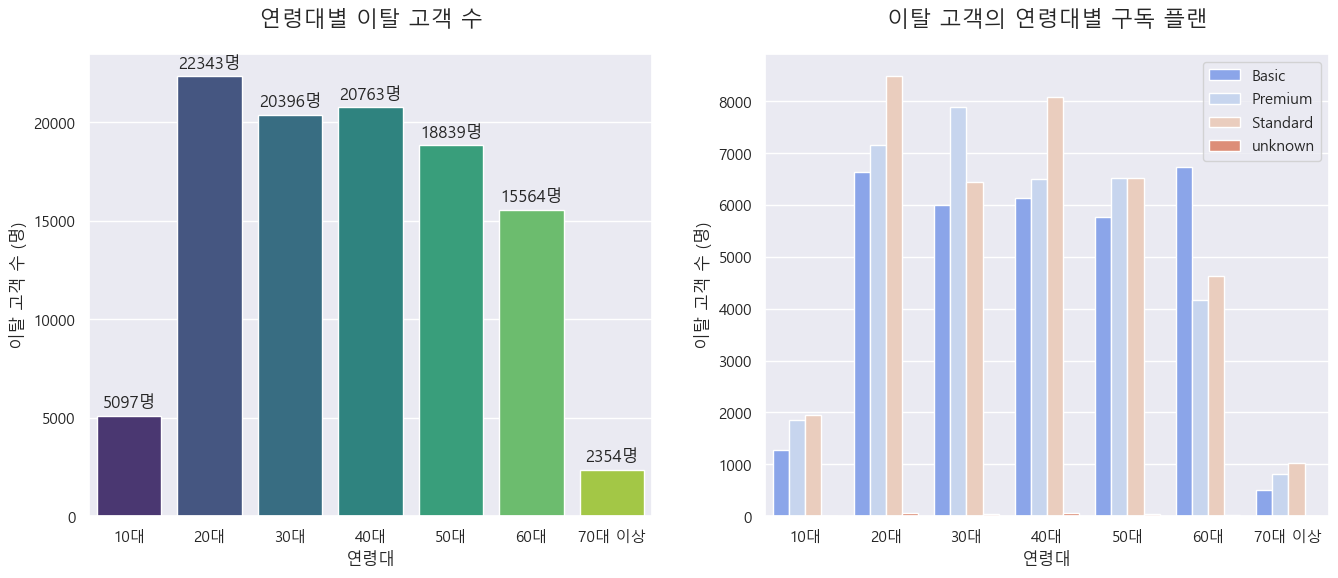

In [50]:
# 시각화
# 연령대별 이탈 고객 + 구독 플랜
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
sns.set_theme(style="darkgrid", font="Malgun Gothic", rc={"axes.unicode_minus": False})

# 시각화 시 편의를 위해 임시 df 생성(Churn이 Yes인 데이터만)
churned_df = df_denoised[df_denoised['Churn'] == 'Yes'].copy()

# 연령대 그룹화
bins = [10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상']
churned_df['Age_group'] = pd.cut(churned_df['Age'], bins=bins, labels=labels, right=False)

# 연령대별 고객 수
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0] = sns.countplot(data=churned_df, x='Age_group', ax=ax[0], palette='viridis', order=labels)
ax[0].set_title('연령대별 이탈 고객 수', fontsize=16, pad=20)
ax[0].set_xlabel('연령대', fontsize=12)
ax[0].set_ylabel('이탈 고객 수 (명)', fontsize=12)
# 막대 위에 숫자 표시
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}명',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
    
# 연령대별 구독 플랜
ax[1] = sns.countplot(data=churned_df, x='Age_group', ax=ax[1], hue='Subscription Plan', palette='coolwarm', order=labels)
ax[1].set_title('이탈 고객의 연령대별 구독 플랜', fontsize=16, pad=20)
ax[1].set_xlabel('연령대', fontsize=12)
ax[1].set_ylabel('이탈 고객 수 (명)', fontsize=12)

plt.legend()
plt.show()


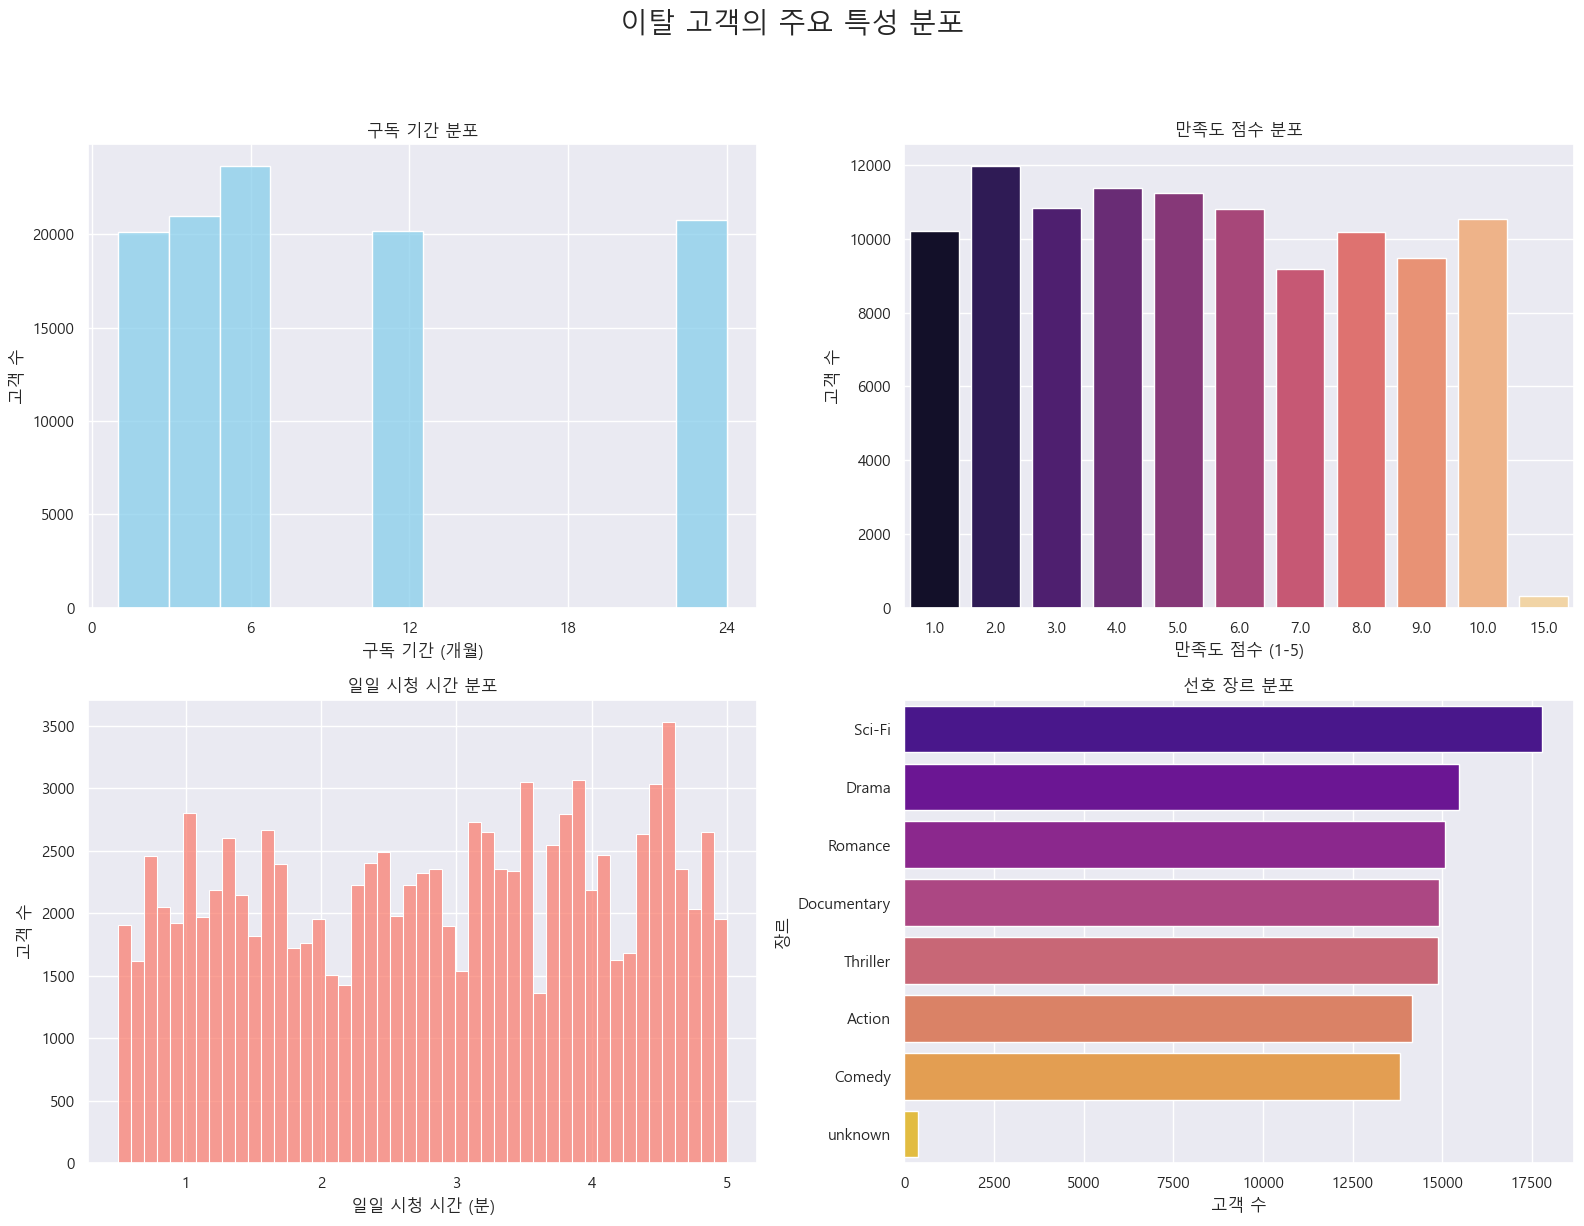

In [51]:
# 이탈 고객의 주요 특성 분포(구독기간, 만족도, 시청시간, 장르)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('이탈 고객의 주요 특성 분포', fontsize=20, y=1.02)

# 구독 기간
sns.histplot(data=churned_df, x='Subscription Length (Months)', ax=axes[0, 0], color='skyblue', binwidth=2)
axes[0, 0].set_title('구독 기간 분포')
axes[0, 0].set_xlabel('구독 기간 (개월)')
axes[0, 0].set_ylabel('고객 수')
axes[0, 0].set_xticks(np.arange(0, 25, 6))

# 만족도
sns.countplot(data=churned_df, x='Customer Satisfaction Score (1-10)', ax=axes[0, 1], palette='magma')
axes[0, 1].set_title('만족도 점수 분포')
axes[0, 1].set_xlabel('만족도 점수 (1-5)')
axes[0, 1].set_ylabel('고객 수')

# 일일 시청 시간
sns.histplot(data=churned_df, x='Daily Watch Time (Hours)', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('일일 시청 시간 분포')
axes[1, 0].set_xlabel('일일 시청 시간 (분)')
axes[1, 0].set_ylabel('고객 수')

# 선호 장르
sns.countplot(data=churned_df, y='Genre Preference', ax=axes[1, 1], palette='plasma', order=churned_df['Genre Preference'].value_counts().index)
axes[1, 1].set_title('선호 장르 분포')
axes[1, 1].set_xlabel('고객 수')
axes[1, 1].set_ylabel('장르')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

---

In [18]:
df_user = pd.read_csv('./data/netflix_userdata_denoised.csv')
df_price = pd.read_csv('./data/country_sub_fee_raw_kbs.csv')

In [19]:
df_price.rename(columns={'region': 'Region'}, inplace=True)

In [20]:
# Region별 평균 요금(결합용 데이터프레임 따로 생성)
price_cols = ['price_usd_basic', 'price_usd_standard', 'price_usd_premium']
df_region_price = df_price.groupby('Region')[price_cols].mean().reset_index()
df_region_price.rename(
    columns={
        'price_usd_basic': 'avg_region_price_basic',
        'price_usd_standard': 'avg_region_price_standard',
        'price_usd_premium': 'avg_region_price_premium'
    }, inplace=True
)

# 사용자 데이터와 지역별 평균 요금 데이터 결합
df_merged = pd.merge(df_user, df_region_price, on='Region', how='left')

In [21]:
# 전체 데이터에 대한 결측치 처리
# 수치형은 중위값, 범주형은 최빈값
for col in df_merged.select_dtypes(include=np.number).columns:
    if df_merged[col].isnull().any():
        df_merged[col].fillna(df_merged[col].median(), inplace=True)

for col in df_merged.select_dtypes(include='object').columns:
    if df_merged[col].isnull().any():
        df_merged[col].fillna(df_merged[col].mode()[0], inplace=True)

In [22]:
# 실제 구독 요금 계산 컬럼 생성
conditions = [
    (df_merged['Subscription Plan'] == 'Basic'),
    (df_merged['Subscription Plan'] == 'Standard'),
    (df_merged['Subscription Plan'] == 'Premium')
]
choices = [
    df_merged['avg_region_price_basic'],
    df_merged['avg_region_price_standard'],
    df_merged['avg_region_price_premium']
]

df_merged['User_Subscription_Price'] = np.select(conditions, choices, default=0)

In [23]:
# 새로운 복합 컬럼 생성
epsilon = 1e-6 # 0으로 나누는 것을 방지하기 위한 작은 값

# 1. 소득 대비 요금
df_merged['Price_Burden_Ratio'] = df_merged['User_Subscription_Price'] / (df_merged['Monthly Income ($)'] + epsilon)
# 2. 요금별 시청시간(1달러당 얼마나 보는지)
df_merged['Watch_Time_per_Dollar'] = df_merged['Daily Watch Time (Hours)'] / (df_merged['User_Subscription_Price'] + epsilon)
# 3. 요금별 만족도
df_merged['Satisfaction_per_Dollar'] = df_merged['Customer Satisfaction Score (1-10)'] / (df_merged['User_Subscription_Price'] + epsilon)
# 4. 월 평균 문의 수
df_merged['Queries_per_Month'] = df_merged['Support Queries Logged'] / (df_merged['Subscription Length (Months)'] + epsilon)

# 무한대 값 처리
df_merged.replace([np.inf, -np.inf], 0, inplace=True)

In [24]:
# 불필요한 컬럼들 제거
cols_unused = [
    'Customer ID', 'Age', 'Genre Preference',
    'avg_region_price_basic', 'avg_region_price_standard', 'avg_region_price_premium'
]
df_feature_engineered = df_merged.drop(columns=cols_unused)

df_feature_engineered.to_csv('./data/netflix_feature_engineered.csv', index=False)

In [35]:
df_feature_engineered = pd.read_csv('./data/netflix_feature_engineered.csv')

In [36]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
sns.set_theme(style="darkgrid", font="Malgun Gothic", rc={"axes.unicode_minus": False})

# Churn 컬럼의 Yes/No를 1/0으로 변환 (hue 팔레트 적용을 위해)
df_feature_engineered['Churn'] = df_feature_engineered['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [57]:
N = df_feature_engineered[df_feature_engineered['Churn'] == 0]['Churn'].count()

yes_df = df_feature_engineered[df_feature_engineered['Churn'] == 1].sample(N)
no_df = df_feature_engineered[df_feature_engineered['Churn'] == 0]

df_feature_engineered_sampled = pd.concat([yes_df, no_df], ignore_index=True)
df_feature_engineered_sampled

,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Region,Payment History (On-Time/Delayed),Subscription Plan,Support Queries Logged,Monthly Income ($),Promotional Offers Used,Number of Profiles Created,Churn,Age_group,User_Subscription_Price,Price_Burden_Ratio,Watch_Time_per_Dollar,Satisfaction_per_Dollar,Queries_per_Month
0,1.0,2.0,3.60,6.0,Laptop,Africa,Delayed,Premium,1.0,8904.0,3.0,2.0,1,50.0,10.299298,0.001157,0.349538,0.194188,0.999999
1,24.0,1.0,3.85,2.0,Mobile,Asia,On-Time,Basic,7.0,3509.0,2.0,1.0,1,60.0,6.500000,0.001852,0.592308,0.153846,0.291667
2,1.0,7.0,1.89,6.0,Smart TV,South America,On-Time,Standard,7.0,1208.0,1.0,3.0,1,40.0,9.744286,0.008066,0.193960,0.718370,6.999993
3,24.0,5.0,3.36,8.0,Tablet,Asia,On-Time,Standard,0.0,6368.0,1.0,5.0,1,40.0,9.955400,0.001563,0.337505,0.502240,0.000000
4,6.0,4.0,2.58,6.0,Laptop,South America,On-Time,Basic,2.0,9951.0,3.0,4.0,1,50.0,6.822308,0.000686,0.378171,0.586312,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25829,6.0,8.0,4.86,6.0,Desktop,Africa,Delayed,Premium,0.0,7654.0,1.0,1.0,0,40.0,10.299298,0.001346,0.471877,0.776752,0.000000
25830,6.0,5.0,4.55,9.0,Smart TV,South America,On-Time,Basic,6.0,3220.0,5.0,1.0,0,60.0,6.822308,0.002119,0.666930,0.732890,1.000000
25831,1.0,9.0,3.66,4.0,Mobile,Asia,Delayed,Premium,3.0,3942.0,0.0,4.0,0,50.0,12.836000,0.003256,0.285136,0.701153,2.999997
25832,3.0,6.0,3.81,2.0,Mobile,Eurasia,On-Time,Premium,3.0,5272.0,2.0,4.0,0,30.0,13.218571,0.002507,0.288231,0.453907,1.000000


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


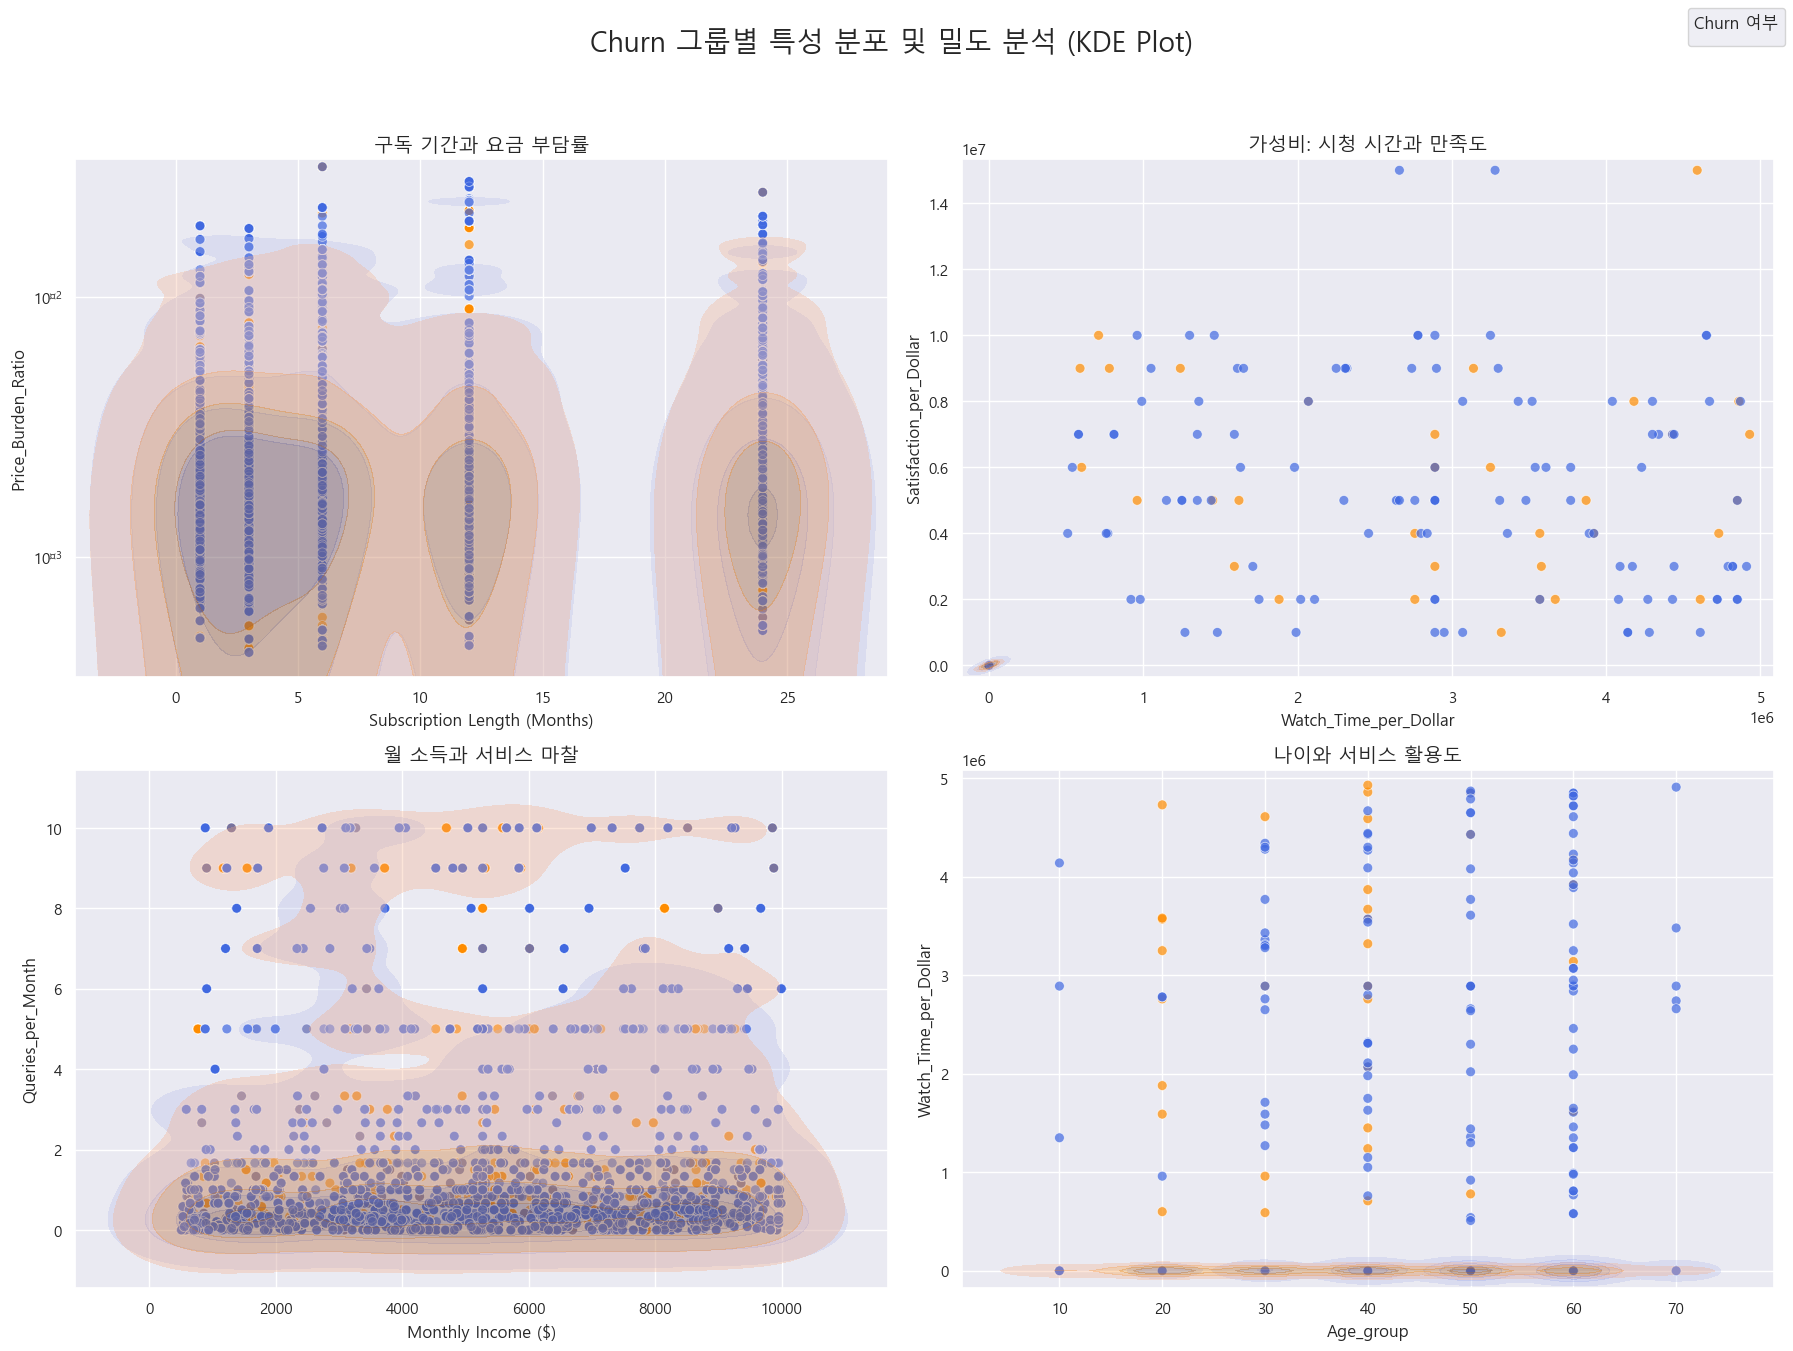

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Churn 그룹별 특성 분포 및 밀도 분석 (KDE Plot)', fontsize=20)
palette = {0: "royalblue", 1: "darkorange"}

plot_configs = [
    {'x': 'Subscription Length (Months)', 'y': 'Price_Burden_Ratio', 'ax': axes[0, 0], 'title': '구독 기간과 요금 부담률'},
    {'x': 'Watch_Time_per_Dollar', 'y': 'Satisfaction_per_Dollar', 'ax': axes[0, 1], 'title': '가성비: 시청 시간과 만족도'},
    {'x': 'Monthly Income ($)', 'y': 'Queries_per_Month', 'ax': axes[1, 0], 'title': '월 소득과 서비스 마찰'},
    {'x': 'Age_group', 'y': 'Watch_Time_per_Dollar', 'ax': axes[1, 1], 'title': '나이와 서비스 활용도'}
]

for config in plot_configs:
    ax = config['ax']
    sns.scatterplot(ax=ax, data=df_feature_engineered_sampled, x=config['x'], y=config['y'], hue='Churn', palette=palette, alpha=0.7, s=50, legend=False)

    sns.kdeplot(ax=ax, data=df_feature_engineered_sampled, x=config['x'], y=config['y'], hue='Churn', palette=palette,
                fill=True,   # 등고선 내부를 채우기
                alpha=0.3,
                levels=5,    # 등고선의 개수
                legend=False)

    ax.set_title(config['title'], fontsize=14)
    if config.get('yscale_log'):
        ax.set_yscale('log')

axes[0, 0].set_yscale('log')

handles, labels = axes[0,0].collections[0].legend_elements()
fig.legend(handles, ['유지 (No)', '이탈 (Yes)'], title='Churn 여부', loc='upper right', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
palette = {0: "royalblue", 1: "darkorange"} # 0: 유지(No), 1: 이탈(Yes)

# Plot 1: 구독 기간 vs 소득 대비 요금 부담률
sns.scatterplot(ax=axes[0, 0], data=df_feature_engineered_sampled, x='Subscription Length (Months)', y='Price_Burden_Ratio', hue='Churn', palette=palette, alpha=0.7, s=50)
axes[0, 0].set_title('구독 기간과 요금 부담률')
axes[0, 0].set_ylabel('요금 부담률 (Price_Burden_Ratio)')
axes[0, 0].set_xlabel('구독 기간 (개월)')
axes[0, 0].set_yscale('log') # y값 편차가 크므로 로그 스케일 적용

# Plot 2: 달러당 시청 시간 vs 달러당 만족도
sns.scatterplot(ax=axes[0, 1], data=df_feature_engineered_sampled, x='Watch_Time_per_Dollar', y='Satisfaction_per_Dollar', hue='Churn', palette=palette, alpha=0.7, s=50)
axes[0, 1].set_title('가성비: 시청 시간과 만족도')
axes[0, 1].set_ylabel('달러당 만족도 (Satisfaction_per_Dollar)')
axes[0, 1].set_xlabel('달러당 시청 시간 (Watch_Time_per_Dollar)')

# Plot 3: 월 소득 vs 월 평균 문의 횟수
sns.scatterplot(ax=axes[1, 0], data=df_feature_engineered_sampled, x='Monthly Income ($)', y='Queries_per_Month', hue='Churn', palette=palette, alpha=0.7, s=50)
axes[1, 0].set_title('월 소득과 서비스 마찰')
axes[1, 0].set_ylabel('월 평균 문의 횟수 (Queries_per_Month)')
axes[1, 0].set_xlabel('월 소득 ($)')

# Plot 4: 나이 vs 달러당 시청 시간
sns.scatterplot(ax=axes[1, 1], data=df_feature_engineered_sampled, x='Age_group', y='Watch_Time_per_Dollar', hue='Churn', palette=palette, alpha=0.7, s=50)
axes[1, 1].set_title('나이와 서비스 활용도')
axes[1, 1].set_ylabel('달러당 시청 시간 (Watch_Time_per_Dollar)')
axes[1, 1].set_xlabel('나이')

# 범례(Legend) 설정
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, ['No', 'Yes'], title='Churn 여부', loc='upper right')
for ax_row in axes:
    for ax in ax_row:
        ax.get_legend().remove()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

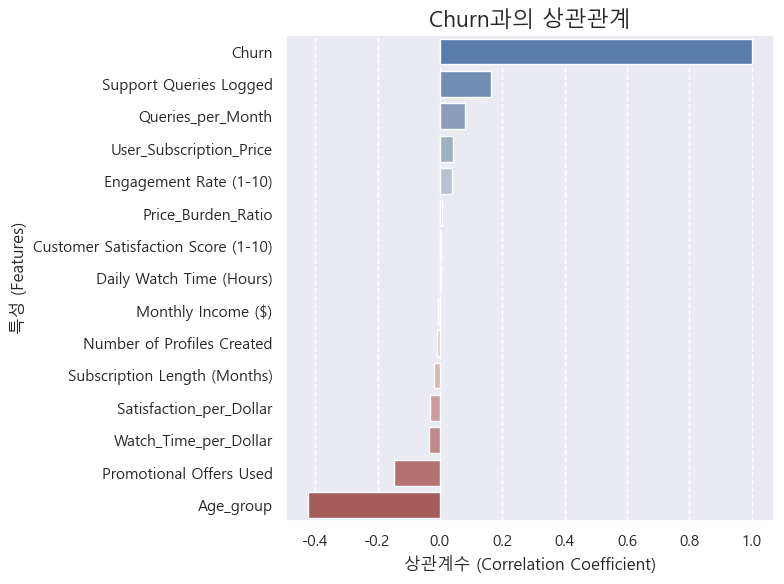

In [67]:
df_numeric = df_feature_engineered_sampled.select_dtypes(include=['number'])

# 3. 상관관계 행렬 계산
corr_matrix = df_numeric.corr()

# 4. Churn과의 상관관계만 추출하여 정렬
churn_correlation = corr_matrix['Churn'].sort_values(ascending=False)

# 6. Churn과의 상관관계 막대그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_correlation.values, y=churn_correlation.index, palette='vlag')
plt.title('Churn과의 상관관계', fontsize=16)
plt.xlabel('상관계수 (Correlation Coefficient)')
plt.ylabel('특성 (Features)')
plt.grid(True, axis='x', linestyle='--')
plt.tight_layout()

Text(0.5, 1.02, '핵심 변수 간의 관계 Pairplot (Churn 그룹별)')

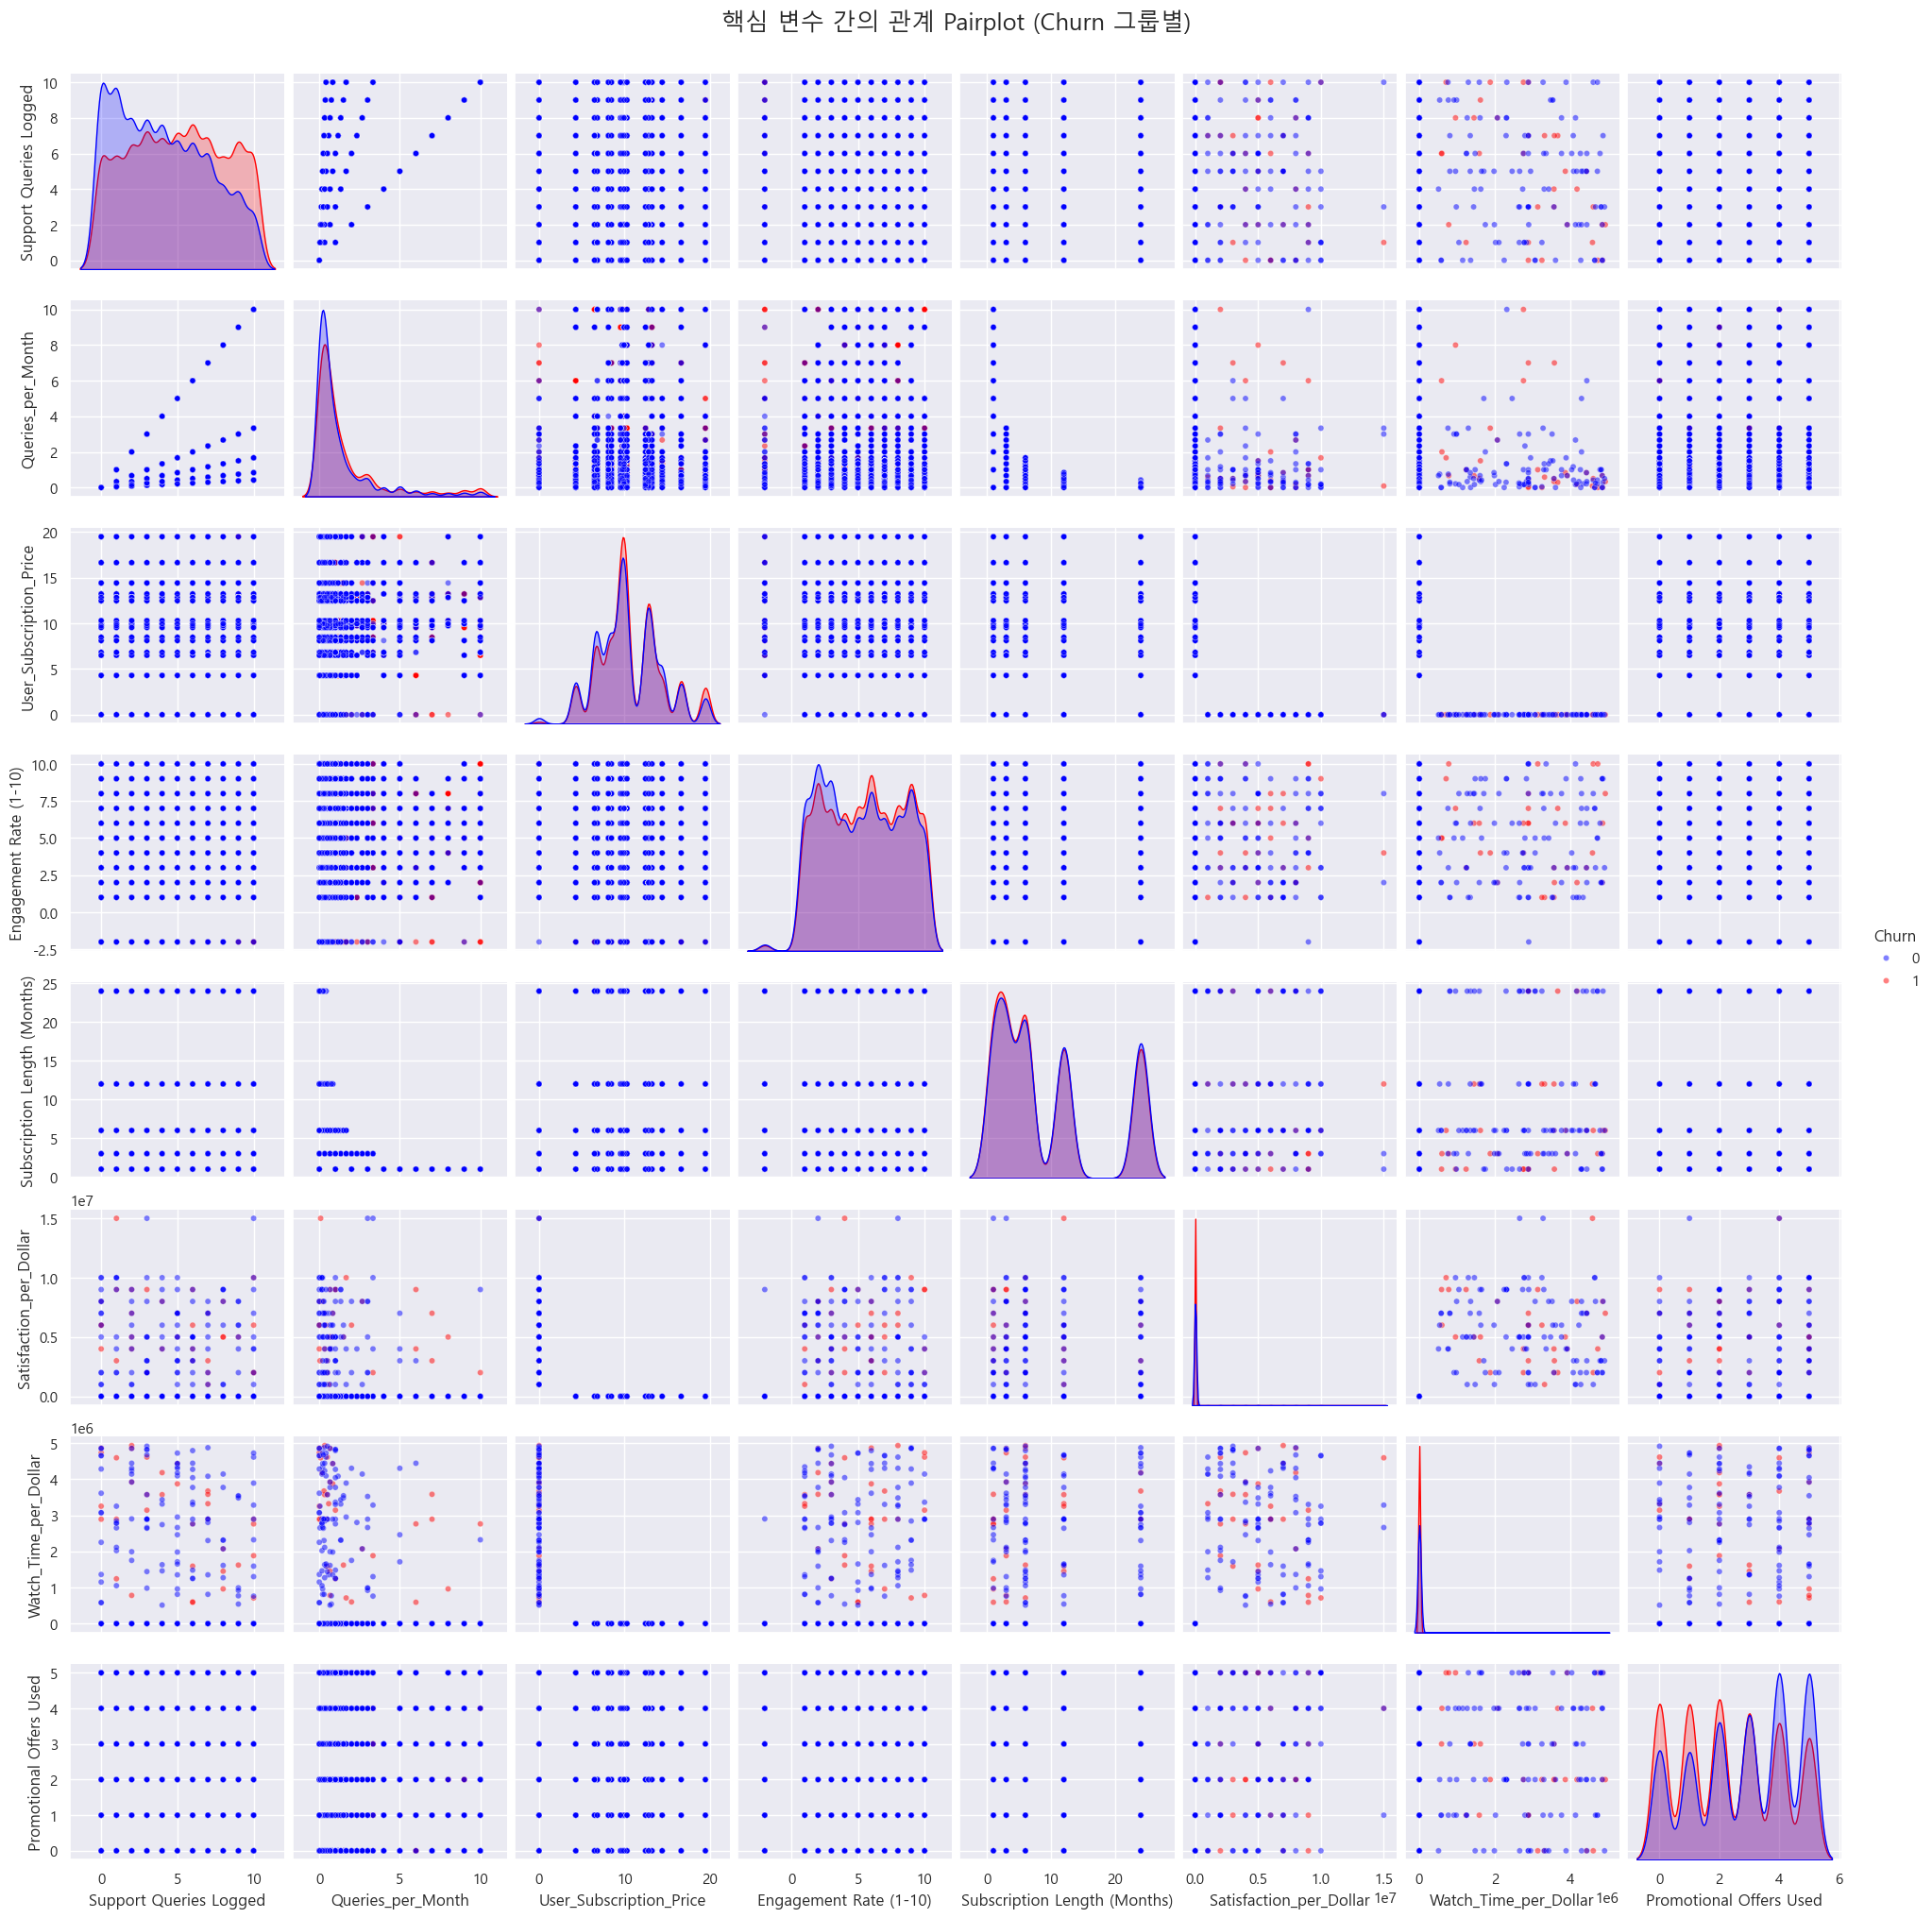

In [ ]:
important_features = [
    # --- Churn과의 양의 상관관계
    'Support Queries Logged',
    'Queries_per_Month',
    'User_Subscription_Price',
    'Engagement Rate (1-10)',
    # --- Churn과의 음의 상관관계
    'Subscription Length (Months)',
    'Satisfaction_per_Dollar',
    'Watch_Time_per_Dollar',
    'Promotional Offers Used',
    # --- 타겟 변수
    'Churn'
]
palette = {0: "blue", 1: "red"}
df_important = df_feature_engineered_sampled[important_features]

# 3. Pairplot 시각화
pairplot_fig = sns.pairplot(df_important, hue='Churn', palette=palette,
                            plot_kws={'alpha': 0.5, 's': 20}) # 점의 투명도와 크기 조절

pairplot_fig.figure.suptitle('핵심 변수 간의 관계 Pairplot (Churn 그룹별)', y=1.02, fontsize=18)
# pairplot_fig.savefig('feature_relationships_pairplot.png')
# print("\n'feature_relationships_pairplot.png' 파일로 Pairplot이 저장되었습니다.")

Text(0.5, 1.02, '핵심 변수 간의 관계 Pairplot (Churn 그룹별)')

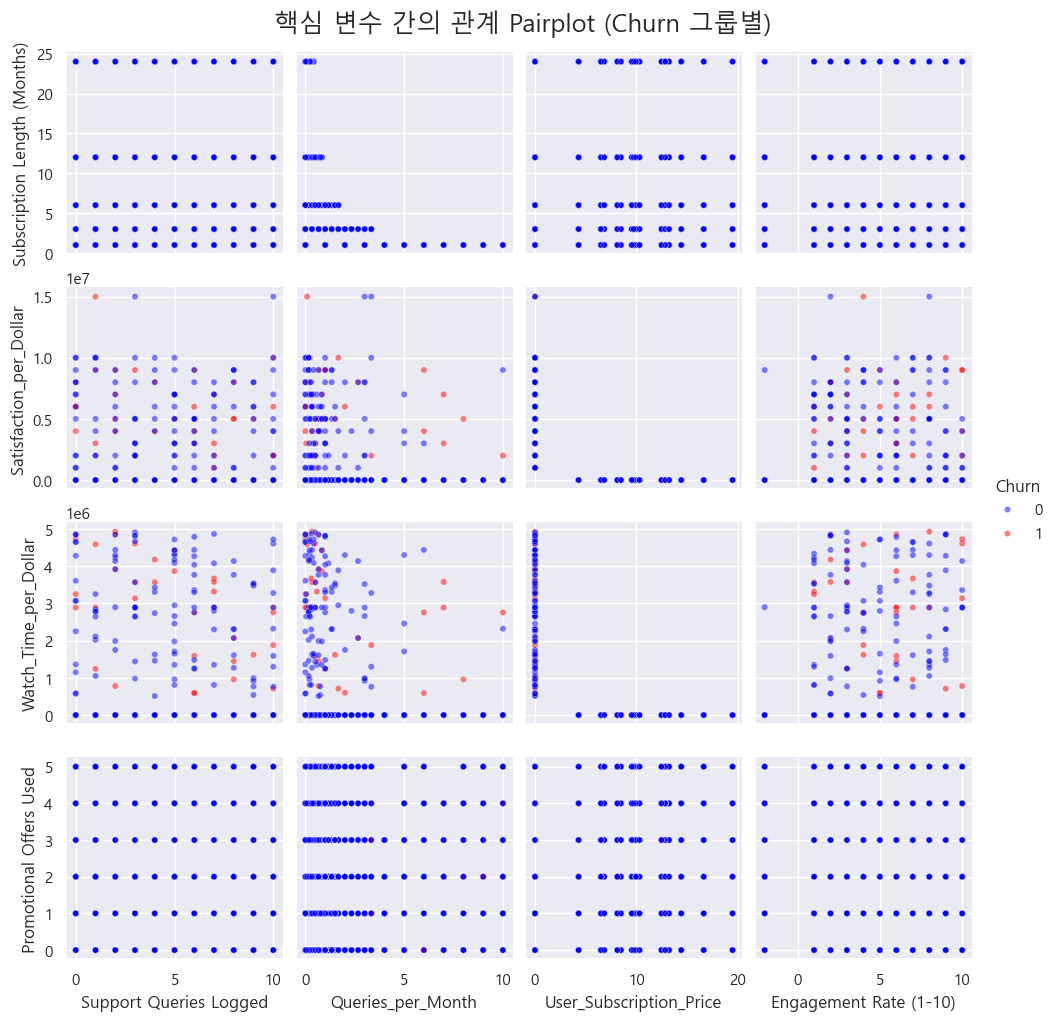

In [72]:
important_features_pos = [
    # --- Churn과의 양의 상관관계
    'Support Queries Logged',
    'Queries_per_Month',
    'User_Subscription_Price',
    'Engagement Rate (1-10)'
    # --- Churn과의 음의 상관관계
    'Subscription Length (Months)',
    'Satisfaction_per_Dollar',
    'Watch_Time_per_Dollar',
    'Promotional Offers Used',
    # --- 타겟 변수
    'Churn'
]
palette = {0: "blue", 1: "red"}
df_important = df_feature_engineered_sampled[important_features]

# 3. Pairplot 시각화
pairplot_fig = sns.pairplot(data=df_important,
                            x_vars=['Support Queries Logged', 'Queries_per_Month', 'User_Subscription_Price', 'Engagement Rate (1-10)'],
                            y_vars=['Subscription Length (Months)', 'Satisfaction_per_Dollar', 'Watch_Time_per_Dollar', 'Promotional Offers Used'],
                            hue='Churn',
                            palette=palette,
                            plot_kws={'alpha': 0.5, 's': 20}
)

pairplot_fig.figure.suptitle('핵심 변수 간의 관계 Pairplot (Churn 그룹별)', y=1.02, fontsize=18)
# pairplot_fig.savefig('feature_relationships_pairplot.png')
# print("\n'feature_relationships_pairplot.png' 파일로 Pairplot이 저장되었습니다.")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import os

In [2]:
df = pd.read_csv('./data/netflix_feature_engineered.csv ')

In [15]:
N = df[df['Churn'] == 'No']['Churn'].count()

yes_df = df[df['Churn'] == 'Yes'].sample(N)
no_df = df[df['Churn'] == 'No']

df_sampled = pd.concat([yes_df, no_df], ignore_index=True)
df_sampled

,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Region,Payment History (On-Time/Delayed),Subscription Plan,Support Queries Logged,Monthly Income ($),Promotional Offers Used,Number of Profiles Created,Churn,Age_group,User_Subscription_Price,Price_Burden_Ratio,Watch_Time_per_Dollar,Satisfaction_per_Dollar,Queries_per_Month
0,1.0,6.0,4.13,7.0,Desktop,North America,On-Time,Standard,1.0,5272.0,0.0,2.0,Yes,20.0,12.473659,0.002366,0.331098,0.481014,0.999999
1,24.0,4.0,1.03,6.0,Desktop,South America,On-Time,Basic,3.0,5234.0,2.0,5.0,Yes,50.0,6.822308,0.001303,0.150975,0.586312,0.125000
2,1.0,9.0,0.59,5.0,Laptop,South America,Delayed,Premium,6.0,8367.0,3.0,1.0,Yes,30.0,13.218571,0.001580,0.044634,0.680860,5.999994
3,24.0,4.0,2.25,2.0,Tablet,North America,Delayed,Basic,4.0,9952.0,2.0,1.0,Yes,20.0,8.475000,0.000852,0.265487,0.471976,0.166667
4,12.0,3.0,0.52,10.0,Laptop,Africa,Delayed,Standard,6.0,4473.0,0.0,1.0,Yes,20.0,8.117368,0.001815,0.064060,0.369578,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24983,6.0,8.0,4.86,6.0,Desktop,Africa,Delayed,Premium,0.0,7654.0,1.0,1.0,No,40.0,10.299298,0.001346,0.471877,0.776752,0.000000
24984,6.0,5.0,4.55,9.0,Smart TV,South America,On-Time,Basic,6.0,3220.0,5.0,1.0,No,60.0,6.822308,0.002119,0.666930,0.732890,1.000000
24985,1.0,9.0,3.66,4.0,Mobile,Asia,Delayed,Premium,3.0,3942.0,0.0,4.0,No,50.0,12.836000,0.003256,0.285136,0.701153,2.999997
24986,3.0,6.0,3.81,2.0,Mobile,Eurasia,On-Time,Premium,3.0,5272.0,2.0,4.0,No,30.0,13.218571,0.002507,0.288231,0.453907,1.000000


In [16]:
numerical_features = df_sampled.select_dtypes(include=np.number).columns
print(f"\n분석 대상 숫자형 특성: {list(numerical_features)}")

X = df_sampled[numerical_features]
y = df_sampled['Churn']

# PCA를 위해 데이터 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


분석 대상 숫자형 특성: ['Subscription Length (Months)', 'Customer Satisfaction Score (1-10)', 'Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 'Support Queries Logged', 'Monthly Income ($)', 'Promotional Offers Used', 'Number of Profiles Created', 'Age_group', 'User_Subscription_Price', 'Price_Burden_Ratio', 'Watch_Time_per_Dollar', 'Satisfaction_per_Dollar', 'Queries_per_Month']


In [19]:
# PCA 모델 생성 및 학습 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"원본 데이터 형태: {X_scaled.shape}")
print(f"PCA 변환 후 데이터 형태: {X_pca.shape}")
print(f"주성분별 설명된 분산 비율: {pca.explained_variance_ratio_}")
print(f"총 설명된 분산: {sum(pca.explained_variance_ratio_):.2f}")

원본 데이터 형태: (24988, 14)
PCA 변환 후 데이터 형태: (24988, 2)
주성분별 설명된 분산 비율: [0.14117512 0.12657883]
총 설명된 분산: 0.27


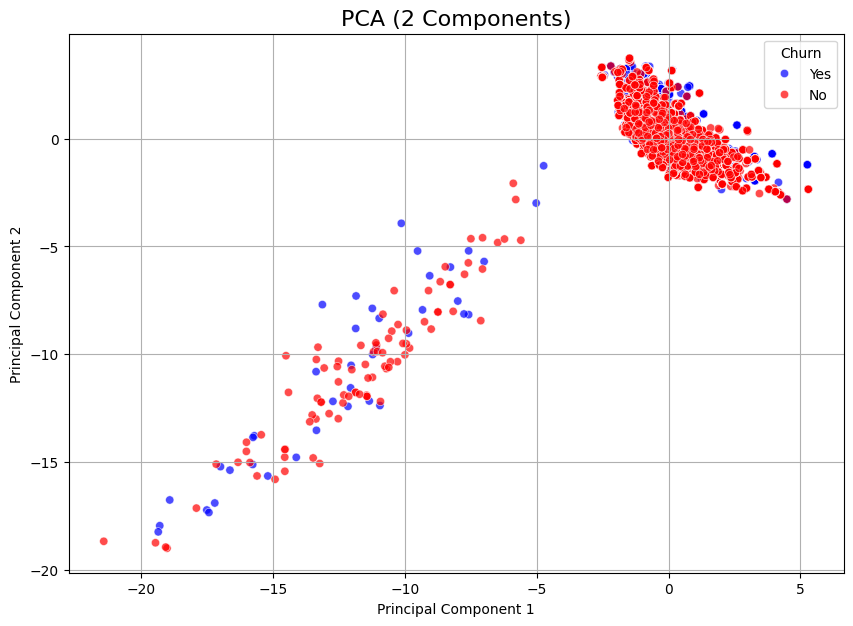

In [20]:
# PCA 결과 시각화
plt.figure(figsize=(10, 7))
palette = {'Yes': "blue", 'No': "red", 'Maybe': "yellow"}

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=palette, alpha=0.7)

plt.title('PCA (2 Components)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(title='Churn')
plt.grid(True)

plt.show()